# DSC 640 Weeks 7 & 8

## Arbaz Khan

My name is Arbaz Khan, and I am a statistical analyst for the state of Washington, and I will be looking at the winning numbers from a variety of lottery systems today in order to determine how random the selection of winning lottery numbers truly is. To accomplish this, we will be aggregating the winning numbers from a variety of popular lotteries, such as Mega and PowerBall, in order to determine if there are any discernable patterns in selecting the winning numbers. 

To begin, we will separate out groups of winning numbers into individual values, in order to plot the frequencies of each number's occurrence within a lottery system. 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

df1 = pd.read_csv('powerball.csv', parse_dates=['Draw Date'])
df2 = pd.read_csv('tenWinning.csv', parse_dates=['Draw Date'])
df3 = pd.read_csv('mega.csv', parse_dates=['Draw Date'])

# Change winning numbers into the format of a list of int values, by splitting based on whitespace
df1['Winning Numbers'] = df1['Winning Numbers'].apply(lambda x: list(map(int, x.split())))

# Utilize explode function, so that one row which contains a list of x ints turns into 
# x rows with one int value each
df1Expl = df1.explode('Winning Numbers').rename(columns={'Winning Numbers': 'Number'})

df1Expl.head(5)

,Draw Date,Number,Multiplier
0,2024-04-20,4,3.0
0,2024-04-20,35,3.0
0,2024-04-20,41,3.0
0,2024-04-20,44,3.0
0,2024-04-20,58,3.0


In [19]:
# Change winning numbers into the format of a list of int values, by splitting based on whitespace
df2['Winning Numbers'] = df2['Winning Numbers'].apply(lambda x: list(map(int, x.split())))

# Utilize explode function, so that one row which contains a list of x ints turns into 
# x rows with one int value each
df2Expl = df2.explode('Winning Numbers').rename(columns={'Winning Numbers': 'Number'})

df2Expl.head(5)

,Draw Date,Number
0,2024-04-20,1
0,2024-04-20,8
0,2024-04-20,17
0,2024-04-20,18
0,2024-04-20,34


In [20]:
# Change winning numbers into the format of a list of int values, by splitting based on whitespace
df3['Winning Numbers'] = df3['Winning Numbers'].apply(lambda x: list(map(int, x.split())))

# Utilize explode function, so that one row which contains a list of x ints turns into 
# x rows with one int value each
df3Expl = df3.explode('Winning Numbers').rename(columns={'Winning Numbers': 'Number'})

df3Expl.head(5)

,Draw Date,Number,Mega Ball,Multiplier
0,2024-04-16,21,2,4.0
0,2024-04-16,26,2,4.0
0,2024-04-16,36,2,4.0
0,2024-04-16,44,2,4.0
0,2024-04-16,59,2,4.0


Now that our datasets contain individual numbers for each row, we will export these datasets into CSV and upload them into PowerBI in order to generate visuals to demonstrate the occurrence of each number.

In [22]:
# Export dataframes to CSV to import into PowerBI
df1Expl.to_csv('df1Expl.csv', index=False)
df2Expl.to_csv('df2Expl.csv', index=False)
df3Expl.to_csv('df3Expl.csv', index=False)

## Occurrence of Individual Values in Lottery Wins

Let us observe this histogram of winning values for the lottery systems:

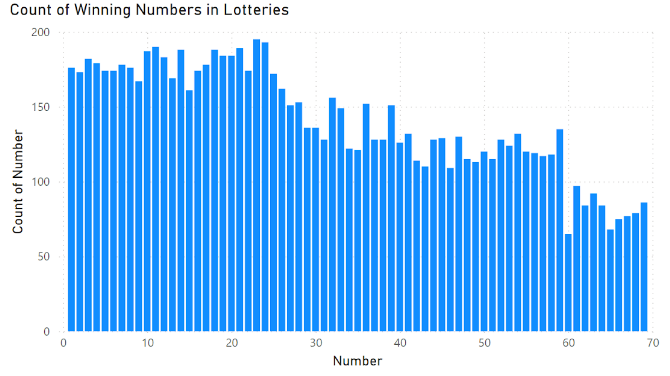

In [29]:
from IPython.display import display, Image
display(Image(filename="graph1.png"))

From the plot, we can note that the frequency of each number seems to decrease as values get higher, and that the number 60 seems to be the least commonly selected value. Below, we have a Density Plot that further demonstrates this trend with a more continuous visualization:

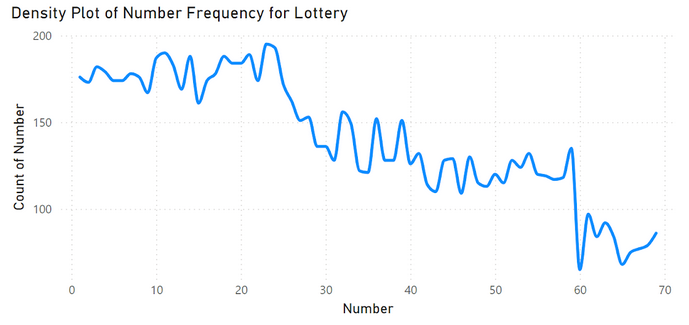

In [30]:
display(Image(filename="graph2.png"))

This seems to indicate the possibility that the winning numbers are in fact not selected randomly, and that higher numbers are less frequently chosen as winning numbers. If the selection were truly random, we would see a shape more closely resembling a uniform distribution, or a straight line across with possible slight variations. 

This discrepancy is even more clearly noted with the bubble chart:

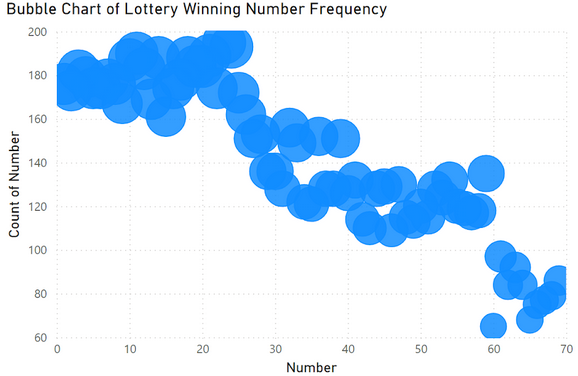

In [31]:
display(Image(filename="graph3.png"))

Here, we can note that the size of each bubble correlates to the frequency of that number's occurrence in the dataset. 

# Time-dependent Evolution of Lottery Winning Numbers

If the selection of winning numbers is believed to be truly random, we would see a uniform distribution of the Sum x of all winning numbers within a given year of lotteries, given an equivalent quantity of lotteries. However, the following scatterplot shows this may not be the case:

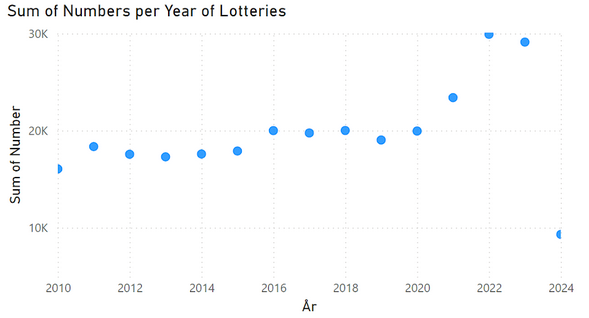

In [32]:
display(Image(filename="graph4.png"))

This distribution is mostly uniform; however, a sharp change can be noted from the years 2021 and onwards, showing a higher value for the sum of winning numbers once past the year 2021. This could indicate a change in the lottery system for those years, which is possibly explained by the COVID-19 epidemic driving change in the number of lottery tickets purchased. 

Nevertheless, the important thing to note here is that the SUM of winning lottery numbers is mostly uniform throughout time, save the possible outliers that occurred during COVID-19. This indicates that the general selection of numbers within a range falls along a mostly uniform value; however, individual values within that range do not appear to have as uniform of a selection, as can be noted in the previous visualizations.

# Statistical Analysis of Winning Numbers' Randomness

Now, we will utilize the Chi-squared test for Uniformity to numerically determine how close to uniform the distribution of winning values truly is, starting with our dataset for PowerBall.

In [26]:
from scipy.stats import chisquare

freqs = df1Expl['Number'].value_counts().sort_index()
expected = [freqs.mean()] * len(freqs)
chi2, p = chisquare(f_obs=freqs, f_exp=expected)

print(f"Chi-square test statistic = {chi2:.2f}, p-value = {p:.4f}")

Chi-square test statistic = 620.41, p-value = 0.0000


From our Chi-squared test, we can note we have received a p-value of 0. In a uniformity test, a p-value of > 0.05 indicates we are 95% confident that the data does not diverge from our null hypothesis of uniformity. However, our p-value of 0.0 is very significantly lower than 0.05, indicating a very high likelihood of non-randomness in numerical selection. If we repeat this test for the other datasets:

In [27]:
freqs = df2Expl['Number'].value_counts().sort_index()
expected = [freqs.mean()] * len(freqs)
chi2, p = chisquare(f_obs=freqs, f_exp=expected)

print(f"Chi-square test statistic = {chi2:.2f}, p-value = {p:.4f}")

Chi-square test statistic = 60.68, p-value = 0.9375


In [28]:
freqs = df3Expl['Number'].value_counts().sort_index()
expected = [freqs.mean()] * len(freqs)
chi2, p = chisquare(f_obs=freqs, f_exp=expected)

print(f"Chi-square test statistic = {chi2:.2f}, p-value = {p:.4f}")

Chi-square test statistic = 1602.14, p-value = 0.0000


We can see that the Mega lottery also has a p-value of 0, indicating the both PowerBall and Mega have just about 0 probability of random number selection. However, of note is that the Pick 10 lottery is the only one that has a p-value > 0.05, and in fact the p-value is extremely high at 0.9375. This indicates that there is an extremely low probability of non-randomness in the selection of winning numbers for that particular lottery. If we observe the histogram showing the frequency of each winning number for the Pick 10 lottery only:

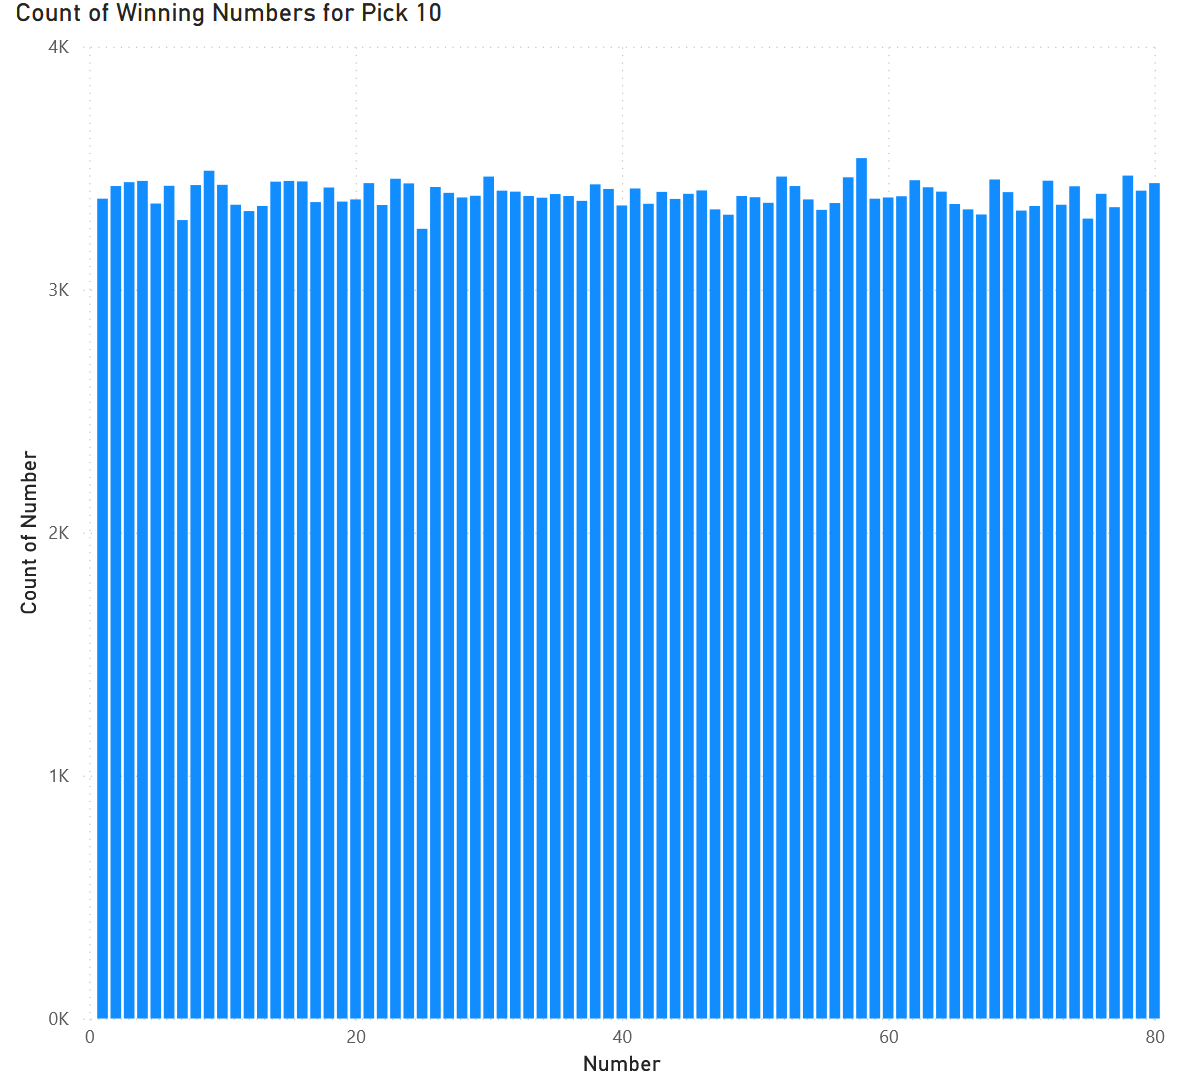

In [33]:
display(Image(filename="graph5.png"))

We can see visually a much more uniform distribution. This is indicitive of a more random selection of winning values, as opposed to that of PowerBall and Mega lotteries.

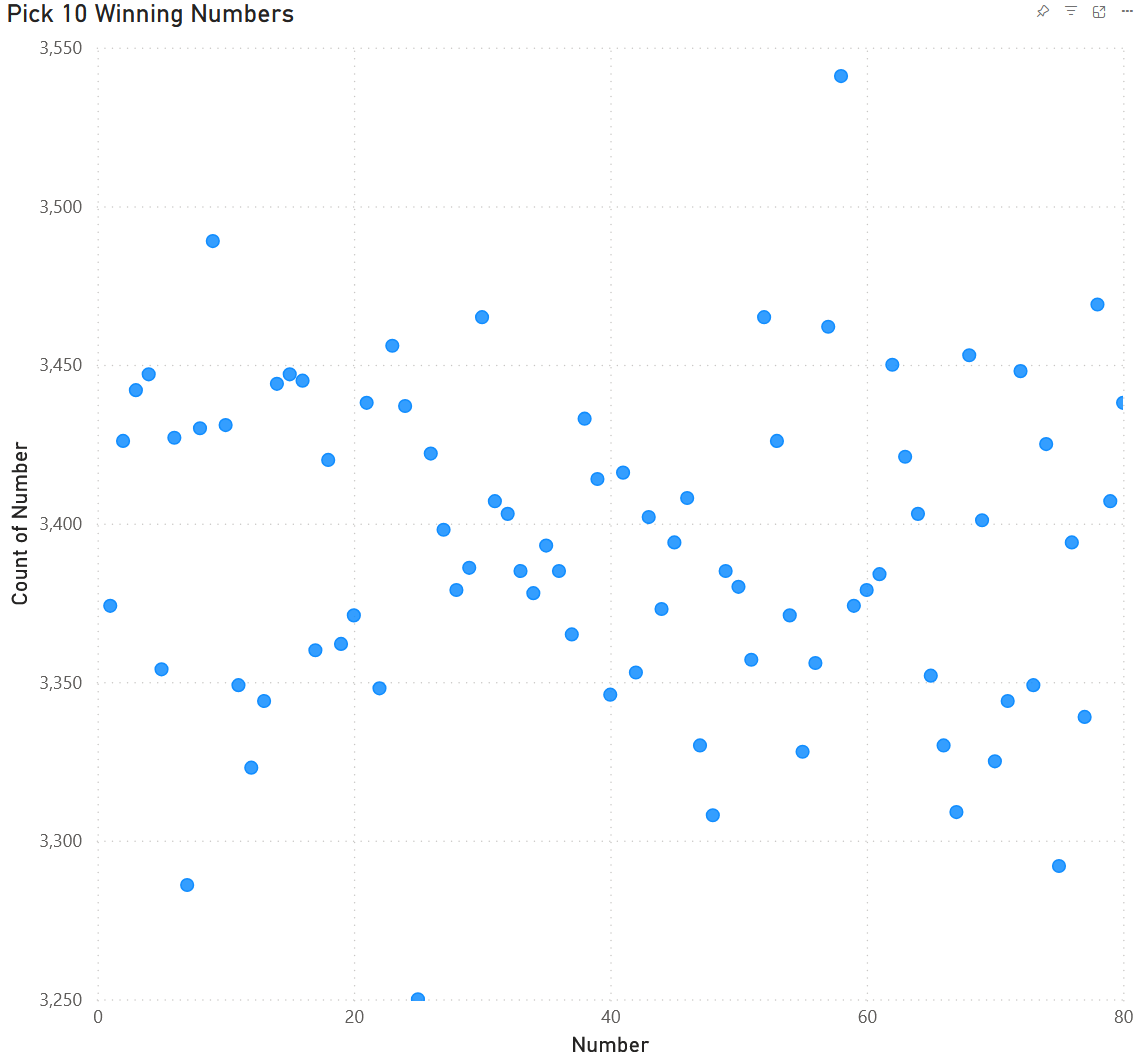

In [34]:
display(Image(filename="graph6.png"))

The above scatterplot further exemplifies this point, showing no clear, distinct trend in number selection, and indicating a uniform distribution.

# Final Remarks

From our data, it can be shown that the PowerBall and Mega lotteries specifically had a very low degree of randomness, indicated by the non-uniformity of the visualizations, alongside both Chi-squared tests yielding a p-value of 0. In contrast, Pick 10 had a very high p-value alongside visually uniform distributions, indicating a very high probability of randomness in number selection. In conclusion, generally, from our data, it does not appear the all lotteries utilize completely random systems for winning number selection. However, we were able to deduce a high degree of randomness for the Pick 10 lottery only. My recommendation would be, for lottery consumers wanting legitimately random winning number selection, to only utilize the Pick 10 lottery. However, the remaining two lottery systems could potentially be exploited by choosing numbers that have a higher chance of appearing in the winning tickets.